In [6]:
from langgraph.graph import START, END, StateGraph
from pydantic import BaseModel
from IPython.display import Image, display

In [7]:
class PortFolioState(BaseModel):
    amount_yuan: float
    total_yuan: float
    total_inr: float

In [ ]:
def calculate_total_with_interest(state: PortFolioState) -> PortFolioState:
    interest_rate = 0.05
    state.total_yuan += state.amount_yuan * (1+interest_rate)
    return state

def convert_yuan_to_inr(state: PortFolioState) -> PortFolioState:
    exchange_rate = 12.30
    state.total_inr = state.total_yuan * exchange_rate
    return state

In [10]:
builder = StateGraph(PortFolioState)

builder.add_node("calculate_total_with_interest", calculate_total_with_interest)
builder.add_node("convert_yuan_to_inr", convert_yuan_to_inr)

builder.add_edge(START, "calculate_total_with_interest")
builder.add_edge("calculate_total_with_interest", "convert_yuan_to_inr")
builder.add_edge("convert_yuan_to_inr", END)

graph = builder.compile()

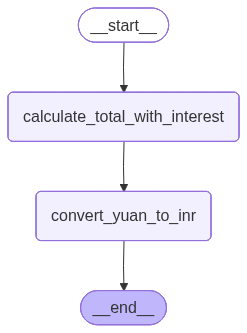

In [16]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
graph.invoke({"amount_yuan": 1000, "total_yuan": 0, "total_inr": 0})

{'amount_yuan': 1000.0, 'total_yuan': 50.0, 'total_inr': 615.0}